In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
dow_jones_raw = pd.read_csv("../data/dow_jones_index.data")

In [61]:
dow_jones_raw.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [62]:
dow_jones_raw.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

## Clean the data.
* Convert dollars to float64 (sometimes it is more cost efficient to convert to int by multiplying by 100)
* Convert date to datetime and reindex

In [63]:
dow_jones_raw.loc[:, ('open')] = dow_jones_raw['open'].astype('str').str.strip('$')

In [64]:
dollars=[]
for column in dow_jones_raw.columns:
    if column =='stock' or column =='date':
        continue
    elif dow_jones_raw[column].dtype == 'object':
        dollars.append(column)
    else:
        continue

In [66]:
for name in dollars:
    dow_jones_raw.loc[:, (name)] = dow_jones_raw[name].astype('str').str.strip('$').astype('float64')

In [67]:
dow_jones_raw.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [75]:
dow_jones_raw['stock'].unique()

array(['AA', 'AXP', 'BA', 'BAC', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE',
       'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KRFT', 'KO', 'MCD',
       'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'T', 'TRV', 'UTX', 'VZ', 'WMT',
       'XOM'], dtype=object)

In [68]:
dow_jones_raw['date'] = pd.to_datetime(dow_jones_raw['date'])

In [69]:
dow_jones_raw.set_index(['date'], inplace = True)

In [76]:
aa.tail()

,quarter,stock,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,
2011-05-27,2,AA,15.96,16.48,15.83,16.48,77236662,3.25815,-34.700711,118281015.0,16.73,15.92,-4.84160,68,0.182039
2011-06-03,2,AA,16.73,16.83,15.77,15.92,77152591,-4.84160,-0.108849,77236662.0,15.92,15.28,-4.02010,61,0.188442
2011-06-10,2,AA,15.92,16.03,15.17,15.28,94970970,-4.02010,23.094985,77152591.0,15.29,14.72,-3.72793,54,0.196335
2011-06-17,2,AA,15.29,15.50,14.59,14.72,111273573,-3.72793,17.165880,94970970.0,14.67,15.23,3.81731,47,0.203804
2011-06-24,2,AA,14.67,15.60,14.56,15.23,99423717,3.81731,-10.649299,111273573.0,15.22,16.31,7.16163,40,0.196980


In [90]:
a_few_companies = dow_jones_raw[(dow_jones_raw['stock'] == 'AA') | 
                                (dow_jones_raw['stock'] == 'BA' )|
                                (dow_jones_raw['stock'] == 'GE') |
                                (dow_jones_raw['stock'] == 'JNJ')|
                                (dow_jones_raw['stock'] == 'PG')
                               ]
a_few_companies.sort_index(inplace=True)

/home/rob/anaconda3/envs/mlalgos/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(734144.0, 734312.0)

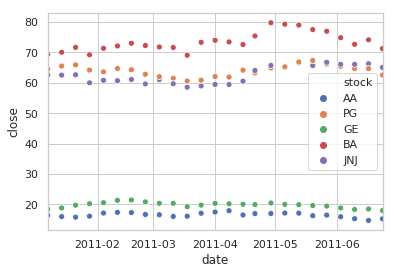

In [92]:
sns.set(style="whitegrid")
ax = sns.scatterplot(x=a_few_companies.index, 
                     y="close",
                     hue = 'stock',
                     data=a_few_companies
                    )
plt.xlim('2011-01-07', '2011-06-24 	')